In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.ion()
%matplotlib inline

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# FASE 1: CARGA Y EXPLORACIÓN INICIAL

In [3]:


ruta = "D:/RENATO/Desktop/data/peru_student_enrollment_data_2023.csv"

try:
    df = pd.read_csv(ruta, encoding='utf-8', sep=';')
    print(" Dataset cargado exitosamente")
    print(f" Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas\n")
except Exception as e:
    print(f" Error al cargar el dataset: {e}")

# Vista previa
print(" Primeras 5 filas del dataset:")
print(df.head())
print("\n" + "-"*90 + "\n")

# Información de columnas
print(" Información de columnas:")
print(df.info())
print("\n" + "-"*90 + "\n")

# Valores únicos por columna
print(" Valores únicos por columna:")
for col in df.columns:
    print(f"  {col:40s}: {df[col].nunique():6,} valores únicos")
print("\n" + "="*90 + "\n")

 Dataset cargado exitosamente
 Dimensiones: 37,582 filas x 21 columnas

 Primeras 5 filas del dataset:
  ENROLLMENT  TUITION PAYMENT MARCH 2022  TUITION PAYMENT MARCH 2023 GENDER  \
0      Nuevo                           0                           0      M   
1      Nuevo                           1                           0      M   
2      Nuevo                           1                           1      F   
3      Nuevo                           0                           0      F   
4      Nuevo                           1                           1      F   

  TYPE OF EDUCATIONAL INSTITUTION EDUCATIONAL INSTITUTION INSTITUTION STATUS  \
0                       INSTITUTO                    IDAT            PRIVADA   
1                         COLEGIO            COLEGIO SISE            PRIVADA   
2                             NaN                     NaN                NaN   
3                         COLEGIO   1220 SAN JOSE MARELLO            ESTATAL   
4                     

# 2. LIMPIEZA Y PREPARACIÓN DE DATOS

In [4]:
# Crear copia de trabajo
df_clean = df.copy()

# Verificar y reportar valores nulos
print(" Valores nulos por columna:")
null_counts = df_clean.isnull().sum()
null_pct = (null_counts / len(df_clean)) * 100
null_df = pd.DataFrame({
    'Nulos': null_counts,
    'Porcentaje': null_pct
}).sort_values('Nulos', ascending=False)
print(null_df[null_df['Nulos'] > 0])

if null_df['Nulos'].sum() == 0:
    print("   No se encontraron valores nulos")
print("\n")

# Convertir columnas numéricas
numeric_cols = ['TUITION PAYMENT MARCH 2022', 'NUMBER OF ENROLLED COURSE']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        print(f" Columna '{col}' convertida a numérico")

# Estandarizar nombres de columnas
df_clean.columns = df_clean.columns.str.strip()

# Remover duplicados si existen
duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"\n  Eliminados {duplicates} registros duplicados")
else:
    print(f"\n No se encontraron duplicados")

print(f"\n Dataset limpio: {df_clean.shape[0]:,} registros")
print("\n" + "="*90 + "\n")

 Valores nulos por columna:
                                 Nulos  Porcentaje
TYPE OF EDUCATIONAL INSTITUTION  21714   57.777660
INSTITUTION STATUS               21714   57.777660
EDUCATIONAL INSTITUTION          19370   51.540631
DEPARTMENT                         736    1.958384
PROVINCE                           736    1.958384
DISTRICT                           736    1.958384
SHIFT/SCHEDULE                      58    0.154329
AGE RANGE OF ENROLLED STUDENT        4    0.010643
GENDER                               2    0.005322
CLASSIFICATION                       1    0.002661
FACULTY                              1    0.002661
PROGRAM/MAJOR                        1    0.002661


 Columna 'TUITION PAYMENT MARCH 2022' convertida a numérico

  Eliminados 1112 registros duplicados

 Dataset limpio: 36,470 registros




# 3. ANÁLISIS EXPLORATORIO DE DATOS

 3.1 ESTADÍSTICAS GENERALES

Total de estudiantes matriculados: 36,470

                                   count unique                     top  \
ENROLLMENT                         36470      3              Reinscrito   
TUITION PAYMENT MARCH 2022       36470.0    NaN                     NaN   
TUITION PAYMENT MARCH 2023       36470.0    NaN                     NaN   
GENDER                             36468      5                       M   
TYPE OF EDUCATIONAL INSTITUTION    15826      3                 COLEGIO   
EDUCATIONAL INSTITUTION            18163   4122             UNIVERSIDAD   
INSTITUTION STATUS                 15826      2                 PRIVADA   
DEPARTMENT                         35779     25                    LIMA   
PROVINCE                           35779    165                    LIMA   
DISTRICT                           35779    694  SAN JUAN DE LURIGANCHO   

                                  freq      mean       std  min  25%  50%  \
ENROLLMENT               

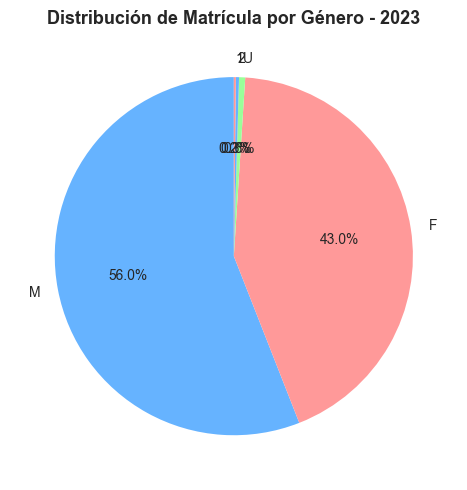

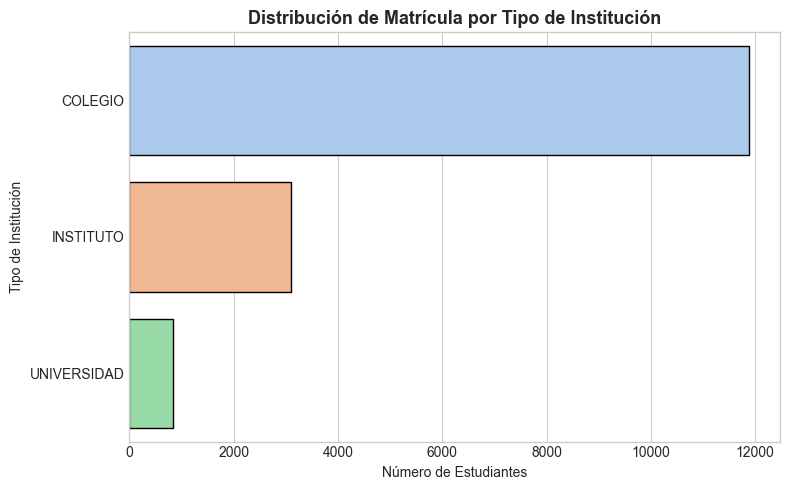

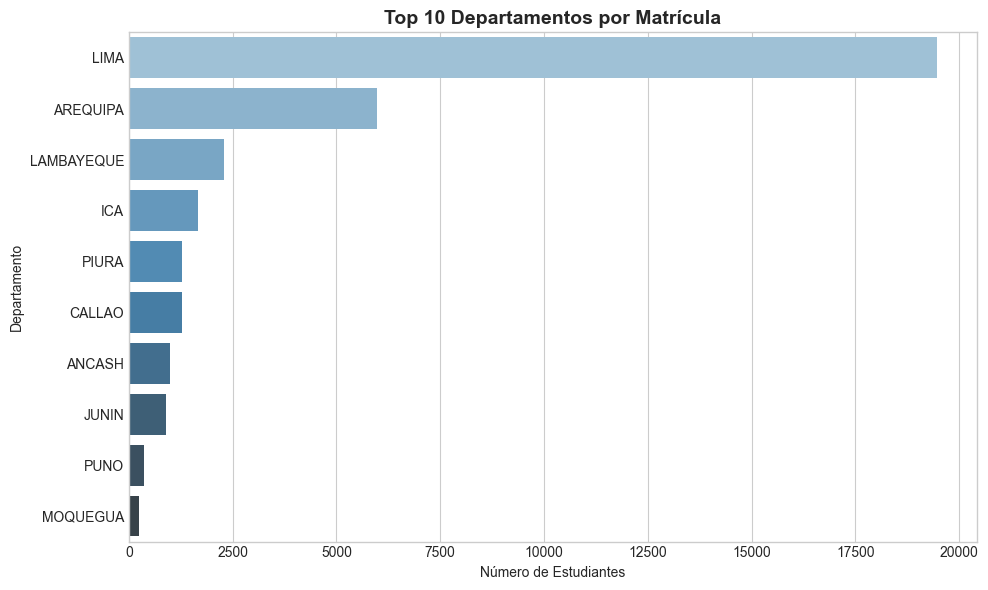

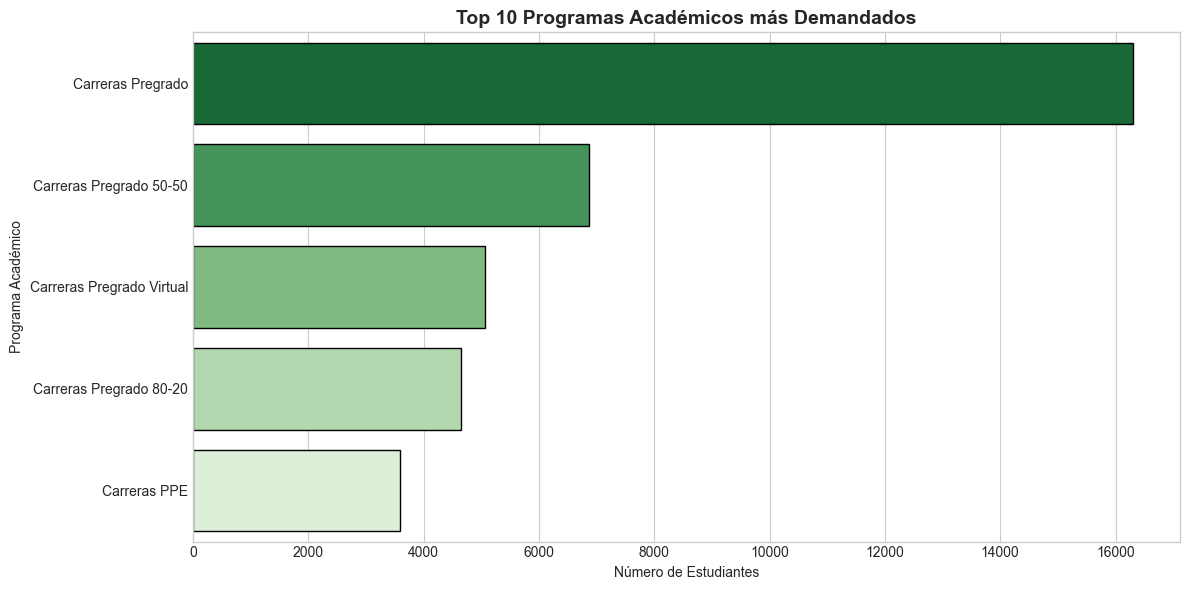

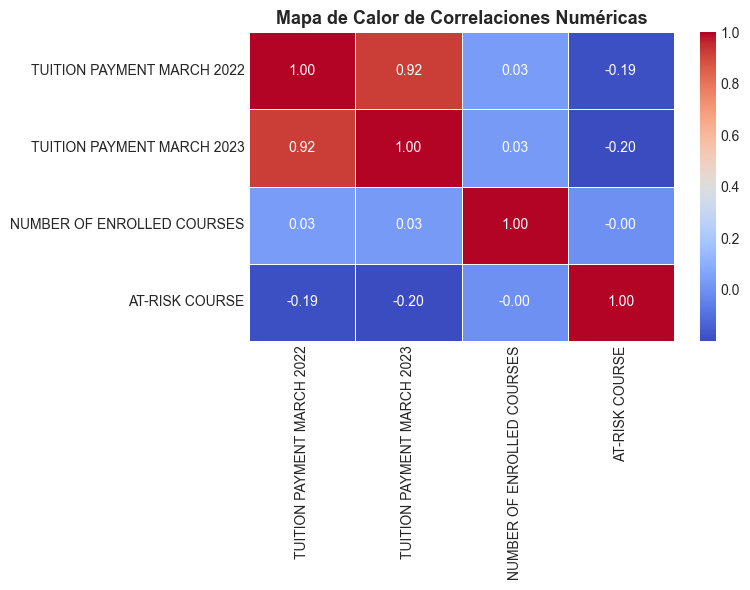

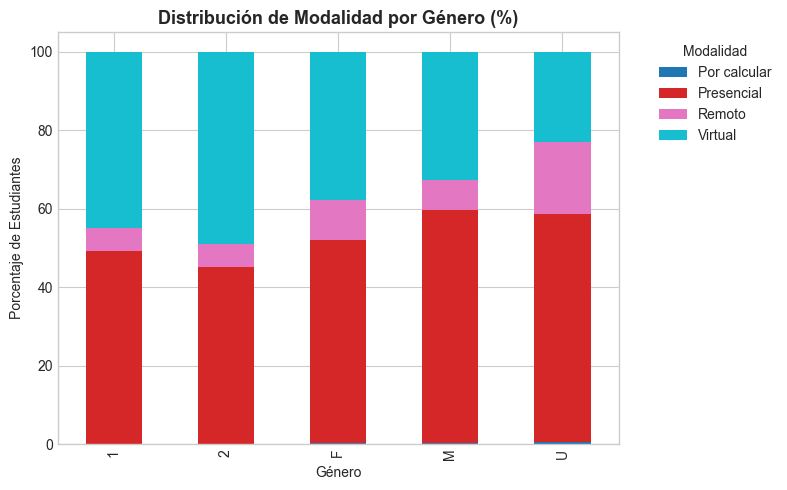

In [ ]:

# 3.1 Estadísticas Generales

print(" 3.1 ESTADÍSTICAS GENERALES\n")

total_estudiantes = len(df_clean)
print(f"Total de estudiantes matriculados: {total_estudiantes:,}\n")

# Mostrar resumen estadístico general
print(df_clean.describe(include='all').transpose().head(10))
print("\n" + "-"*90 + "\n")

# 3.2 Distribución por Género
if 'GENDER' in df_clean.columns:
    print(" Distribución por Género:\n")
    genero_counts = df_clean['GENDER'].value_counts()
    for g, c in genero_counts.items():
        print(f"  • {g:20s}: {c:7,} ({c/total_estudiantes*100:5.2f}%)")
    
    plt.figure(figsize=(6, 5))
    plt.pie(genero_counts, labels=genero_counts.index, autopct='%1.1f%%',
            startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
    plt.title('Distribución de Matrícula por Género - 2023', fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.savefig('00_genero.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '00_genero.png'\n")


# 3.3 Distribución por Tipo de Institución
if 'TYPE OF EDUCATIONAL INSTITUTION' in df_clean.columns:
    tipo_counts = df_clean['TYPE OF EDUCATIONAL INSTITUTION'].value_counts()
    print(" Distribución por Tipo de Institución:\n")
    for t, c in tipo_counts.items():
        print(f"  • {t:30s}: {c:7,} ({c/total_estudiantes*100:5.2f}%)")
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=tipo_counts.values, y=tipo_counts.index, palette="pastel", edgecolor="black")
    plt.title("Distribución de Matrícula por Tipo de Institución", fontsize=13, fontweight='bold')
    plt.xlabel("Número de Estudiantes")
    plt.ylabel("Tipo de Institución")
    plt.tight_layout()
    plt.savefig('00_tipo_institucion.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '00_tipo_institucion.png'\n")


# 3.4 Análisis Geográfico (Top 10)
if 'DEPARTMENT' in df_clean.columns:
    dept_counts = df_clean['DEPARTMENT'].value_counts().head(10)
    print(" Top 10 Departamentos por Matrícula:")
    for i, (dept, c) in enumerate(dept_counts.items(), 1):
        print(f"  {i:2d}. {dept:20s} → {c:7,} estudiantes ({c/total_estudiantes*100:5.2f}%)")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x=dept_counts.values, y=dept_counts.index, palette="Blues_d")
    plt.title("Top 10 Departamentos por Matrícula", fontsize=14, fontweight='bold')
    plt.xlabel("Número de Estudiantes")
    plt.ylabel("Departamento")
    plt.tight_layout()
    plt.savefig('01_analisis_geografico.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '01_analisis_geografico.png'\n")


# 3.5 Programas Académicos (Top 10)
if 'CLASSIFICATION' in df_clean.columns:
    program_counts = df_clean['CLASSIFICATION'].value_counts().head(10)
    print("🎓 Top 10 Programas Académicos más Demandados:\n")
    for i, (prog, c) in enumerate(program_counts.items(), 1):
        print(f"  {i:2d}. {prog[:45]:45s} → {c:7,} estudiantes ({c/total_estudiantes*100:5.2f}%)")
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=program_counts.values, y=program_counts.index, palette="Greens_r", edgecolor="black")
    plt.title("Top 10 Programas Académicos más Demandados", fontsize=14, fontweight='bold')
    plt.xlabel("Número de Estudiantes")
    plt.ylabel("Programa Académico")
    plt.tight_layout()
    plt.savefig('02_programas_academicos.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '02_programas_academicos.png'\n")


# 3.6 Correlaciones Numéricas (si existen columnas numéricas)
num_cols = df_clean.select_dtypes(include=[np.number]).columns
if len(num_cols) > 1:
    print(" Correlación entre variables numéricas:\n")
    corr = df_clean[num_cols].corr()
    print(corr.round(2))
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Mapa de Calor de Correlaciones Numéricas", fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.savefig('03_correlaciones.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '03_correlaciones.png'\n")


# 3.7 Cruce Modalidad vs Género (si existen ambas columnas)
if 'STUDY MODE' in df_clean.columns and 'GENDER' in df_clean.columns:
    cross = pd.crosstab(df_clean['GENDER'], df_clean['STUDY MODE'])
    print(" Relación entre Género y Modalidad de Estudio:\n")
    print(cross, "\n")
    
    cross_pct = (cross.T / cross.T.sum()).T * 100
    cross_pct.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='tab10')
    plt.title("Distribución de Modalidad por Género (%)", fontsize=13, fontweight='bold')
    plt.ylabel("Porcentaje de Estudiantes")
    plt.xlabel("Género")
    plt.legend(title='Modalidad', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('03_modalidad_genero.png', dpi=300, bbox_inches='tight')
    print("✓ Gráfico guardado: '03_modalidad_genero.png'\n")

print("="*90 + "\n")


# 4. ANÁLISIS ESTADÍSTICO

In [6]:

# 4.1 Prueba Chi-cuadrado (Género vs Modalidad)
print(" 4.1 PRUEBA CHI-CUADRADO: Independencia entre variables\n")

if 'GENDER' in df_clean.columns and 'STUDY MODE' in df_clean.columns:
    contingency_table = pd.crosstab(df_clean['GENDER'], df_clean['STUDY MODE'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Análisis: Género vs Modalidad de Estudio")
    print(f"  • Chi-cuadrado: {chi2:.4f}")
    print(f"  • P-valor: {p_value:.6f}")
    print(f"  • Grados de libertad: {dof}")
    
    if p_value < 0.05:
        print(f"  • Conclusión: Existe relación significativa (p < 0.05) ✓")
    else:
        print(f"  • Conclusión: No hay relación significativa (p >= 0.05)")
    print()

# 4.2 Concentración geográfica (Índice de Herfindahl)
print(" 4.2 ÍNDICE DE CONCENTRACIÓN GEOGRÁFICA\n")

if 'DEPARTMENT' in df_clean.columns:
    dept_shares = df_clean['DEPARTMENT'].value_counts() / total_estudiantes
    herfindahl_index = (dept_shares ** 2).sum()
    
    print(f"Índice de Herfindahl-Hirschman (HHI): {herfindahl_index:.4f}")
    print(f"  • Rango: 0 (totalmente disperso) a 1 (totalmente concentrado)")
    
    if herfindahl_index > 0.15:
        print(f"  • Interpretación: Alta concentración geográfica")
    elif herfindahl_index > 0.10:
        print(f"  • Interpretación: Concentración moderada")
    else:
        print(f"  • Interpretación: Baja concentración, distribución equilibrada")

print("\n" + "="*90 + "\n")

 4.1 PRUEBA CHI-CUADRADO: Independencia entre variables

Análisis: Género vs Modalidad de Estudio
  • Chi-cuadrado: 273.8296
  • P-valor: 0.000000
  • Grados de libertad: 12
  • Conclusión: Existe relación significativa (p < 0.05) ✓

 4.2 ÍNDICE DE CONCENTRACIÓN GEOGRÁFICA

Índice de Herfindahl-Hirschman (HHI): 0.3218
  • Rango: 0 (totalmente disperso) a 1 (totalmente concentrado)
  • Interpretación: Alta concentración geográfica




# 5. ANÁLISIS PREDICTIVO BÁSICO

 modelo predictivo 

✓ División: 11778 train / 3926 test

 Precisión del modelo: 82.02%

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.82      0.99      0.90      2985
           2       0.00      0.00      0.00        37
           3       0.81      0.30      0.44       895

    accuracy                           0.82      3926
   macro avg       0.41      0.32      0.33      3926
weighted avg       0.81      0.82      0.78      3926


🔎 Principales características:
                                      Feature  Importance
27   CLASSIFICATION_Carreras Pregrado Virtual    0.575432
26     CLASSIFICATION_Carreras Pregrado 80-20    0.127017
24           CLASSIFICATION_Carreras Pregrado    0.070889
25     CLASSIFICATION_Carreras Pregrado 50-50    0.041124
13                            DEPARTMENT_LIMA    0.029307
32  TYPE OF EDUCATIONAL INSTITUTION_INSTITUTO    0.019969
2                         DEPARTMENT_A

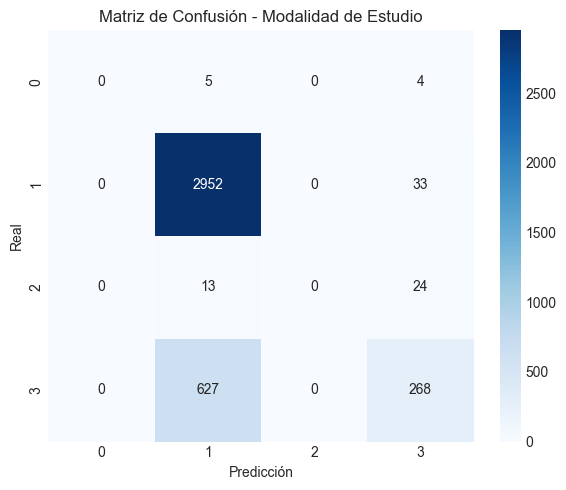

In [11]:

# Verificar columnas necesarias
cols_needed = ['STUDY MODE', 'DEPARTMENT', 'CLASSIFICATION', 'GENDER', 'TYPE OF EDUCATIONAL INSTITUTION']
if all(col in df_clean.columns for col in cols_needed):

    print(" modelo predictivo \n")

    # Preparar datos
    features_cols = [c for c in cols_needed if c != 'STUDY MODE']
    df_model = df_clean[features_cols + ['STUDY MODE']].dropna()
    
    X = pd.get_dummies(df_model[features_cols], drop_first=True)
    y = LabelEncoder().fit_transform(df_model['STUDY MODE'])

    # División train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    print(f"✓ División: {len(X_train)} train / {len(X_test)} test")

    # Entrenar modelo
    model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Resultados
    acc = accuracy_score(y_test, y_pred)
    print(f"\n Precisión del modelo: {acc:.2%}\n")
    print(classification_report(y_test, y_pred))
    
    # Importancia
    feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
    print("\n🔎 Principales características:")
    print(feat_imp.head(10))
    
    # Matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión - Modalidad de Estudio')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

else:
    print(" No se encontraron todas las columnas necesarias para el modelo.")
